In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("academic_stress_levels.csv")

In [3]:
dataframe.shape

(140, 9)

In [4]:
#O objetivo dessa célula é ter um panorama geral dos dados.

pd.set_option("display.max_columns", None)

dataframe.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [5]:
#Essa célula pega amostras aleatórias no DataFrame, está aqui apenas para exibir variedade. A coluna "academic stage" agora mostra novos valores.

dataframe.sample(n=10)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
28,24/07/2025 22:19:51,undergraduate,5,1,disrupted,"Social support (friends, family)",No,4,5
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
24,24/07/2025 22:19:06,undergraduate,4,5,disrupted,Analyze the situation and handle it with intel...,No,4,4
6,24/07/2025 22:09:21,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),No,4,4
103,26/07/2025 09:36:09,high school,1,3,Peaceful,"Social support (friends, family)",No,3,1
21,24/07/2025 22:18:44,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,3
56,24/07/2025 23:02:49,post-graduate,4,4,disrupted,Analyze the situation and handle it with intel...,prefer not to say,4,4
90,25/07/2025 23:34:18,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,Yes,4,4
41,24/07/2025 22:32:36,post-graduate,3,5,Peaceful,Analyze the situation and handle it with intel...,No,3,3


In [6]:
#Trabalhar com espaços causa muito problema então foi tomada a decisão de renomear as colunas.

df_format = pd.DataFrame({'timestamp': dataframe['Timestamp'],
                       'academic_stage': dataframe['Your Academic Stage'],
                       'peer_pressure': dataframe['Peer pressure'],
                       'academic_pressure_home': dataframe['Academic pressure from your home'],
                       'study_environment': dataframe['Study Environment'],
                       'coping_strategy': dataframe['What coping strategy you use as a student?'],
                       'bad_habits': dataframe['Do you have any bad habits like smoking, drinking on a daily basis?'],
                       'academic_competition_level': dataframe['What would you rate the academic  competition in your student life'],
                       'academic_stress_index': dataframe['Rate your academic stress index ']})

In [7]:
df_format.head()

,timestamp,academic_stage,peer_pressure,academic_pressure_home,study_environment,coping_strategy,bad_habits,academic_competition_level,academic_stress_index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [8]:
#A coluna timestamp foi descartada pois não teria utilidade alguma daqui em diante.

df_format = df_format.drop('timestamp', axis =1)

In [9]:
#Construir um dicionário é sempre uma boa prática, principalmente em projetos mais longos ou com mais variáveis. Ajuda a se orientar e evita confusão.

df_dict = {
    "academic_stage": "Grau de educação do estudante.",
    "peer_pressure": "Pressão social",
    "academic_pressure_home": "Expectativas e pressão acadêmica exercida na casa do estudante.",
    "study_environment":"Descrição do ambiente de estudo.",
    "coping_strategy":"Estratégias para lidar com o stress e demais desafios.",
    "bad_habits":"Hábitos negativos que o estudante costuma recorrer devido ao stress.",
    "academic_competition_level":"Intensidade de competição entre os pares.",
    "academic_stress_index":"Intensidade de stress por motivos acadêmicos."
}

In [10]:
df_format.head()

,academic_stage,peer_pressure,academic_pressure_home,study_environment,coping_strategy,bad_habits,academic_competition_level,academic_stress_index
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [11]:
#Objetivo: checar os tipos de dados antes de aplicar o encoding. 

df_format.dtypes

academic_stage                object
peer_pressure                  int64
academic_pressure_home         int64
study_environment             object
coping_strategy               object
bad_habits                    object
academic_competition_level     int64
academic_stress_index          int64
dtype: object

In [12]:
#Nesse caso o objetivo era descobrir se haviam mais de dois valores nessa coluna.

df_format['coping_strategy'].unique()

array(['Analyze the situation and handle it with intellect',
       'Social support (friends, family)',
       'Emotional breakdown (crying a lot)'], dtype=object)

In [13]:
#Neste bloco são definidas as variáveis categóricas que passarão pelo processo de encoding. 
#Devido ao tamanho do Dataset foi decidido utilizar a função "get_dummies" do panda ao invés de outras opções, como importar algum encoder do SKLearn.

categoricas = ['academic_stage', 'study_environment', 'coping_strategy', 'bad_habits']

df_enc = df_format.copy()
for c in categoricas:
    df_enc[c] = df_enc[c].astype('string')


df_enc = pd.get_dummies(df_enc, columns=categoricas, drop_first=True)

#Esse trecho de código salvando a estrutura foi adicionado posteriormente, quando a decisão de criar um sistema integrando o classificador e o regressor foi tomada.
encoding_estrutura = {
    'colunas_categoricas': categoricas,
    'colunas_finais_x': df_enc.drop('academic_stress_index', axis=1).columns.tolist(),
    'valores_unicos': {
        'academic_stage': df_format['academic_stage'].unique().tolist(),
        'study_environment': df_format['study_environment'].unique().tolist(),
        'coping_strategy': df_format['coping_strategy'].unique().tolist(),
        'bad_habits': df_format['bad_habits'].unique().tolist()
    },
    'drop_first': True  
}


joblib.dump(encoding_estrutura, 'pandas_encoding_estrutura.pkl')
print("Estrutura do encoding Salva!")

df_enc.head()


Estrutura do encoding Salva!


,peer_pressure,academic_pressure_home,academic_competition_level,academic_stress_index,academic_stage_post-graduate,academic_stage_undergraduate,study_environment_Peaceful,study_environment_disrupted,coping_strategy_Emotional breakdown (crying a lot),"coping_strategy_Social support (friends, family)",bad_habits_Yes,bad_habits_prefer not to say
0,4,5,3,5,False,True,False,False,False,False,False,False
1,3,4,3,3,False,True,True,False,False,False,False,False
2,1,1,2,4,False,True,True,False,False,True,False,False
3,3,2,4,3,False,True,True,False,False,False,False,False
4,3,3,4,5,False,True,True,False,False,False,False,False


In [14]:
#O objetivo era manter o dataset na mesma ordem inicial, então a coluna "acadmic_stress_index" foi movida para a última posição.

alvo = df_enc.pop('academic_stress_index') 
df_enc['academic_stress_index'] = alvo      

In [15]:
'''Após aplicar o encoding nas variáveis categóricas o próximo passo foi conferir o equilíbrio entre as classes, identificar prevalência e ponderar sobre
a necessidade de aplicar estratégias de balanceamento.'''

y = df_enc['academic_stress_index']

def map_class(valor):
    if pd.isna(valor): return np.nan
    if valor <= 2: return 'Baixo'
    if valor == 3:  return 'Moderado'
    else: return 'Alto'

y_class = y.map(map_class)
y_class.value_counts(dropna=False), y_class.value_counts(normalize=True).round(3)

(academic_stress_index
 Alto        89
 Moderado    36
 Baixo       15
 Name: count, dtype: int64,
 academic_stress_index
 Alto        0.636
 Moderado    0.257
 Baixo       0.107
 Name: proportion, dtype: float64)

In [16]:
#A variável alvo foi definida. 

x = df_enc.drop(columns=['academic_stress_index'])
y = y_class

In [17]:
#A estratificação do treino e teste definida na sequência.

x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, test_size=0.2, random_state=23, stratify=y)

In [18]:
'''A escolha do Random Forest Classifier como modelo se deu por conta de sua robustez e capacidade de balancear os dados durante o treinamento através do 
parâmetro "class weight".'''

classificador = RandomForestClassifier(n_estimators=300, random_state=23, class_weight='balanced')
classificador.fit(x_treino, y_treino)
y_pred = classificador.predict(x_teste)

print(classification_report(y_teste, y_pred, digits=3))
print(confusion_matrix(y_teste, y_pred, labels=['Baixo','Moderado','Alto']))

              precision    recall  f1-score   support

        Alto      0.762     0.889     0.821        18
       Baixo      0.667     0.667     0.667         3
    Moderado      0.500     0.286     0.364         7

    accuracy                          0.714        28
   macro avg      0.643     0.614     0.617        28
weighted avg      0.686     0.714     0.690        28

[[ 2  0  1]
 [ 1  2  4]
 [ 0  2 16]]


O resultado dessa primeira versão não é muito promissor. Analisando a matriz de confusão nota-se que o modelo é bom em identificar casos onde o nível de stress é alto. Naturalmente, afinal a prevalência de registros onde o nível de estresse é "alto" supera e muito as outras duas. 

Entre os 3 casos de estresse "Baixo" nos dados que foram alimentados ao modelo apenas 2 foram classificados corretamente, 1 foi classificado como "Alto".
Entre os 7 casos de estresse "Moderado" nos dados que foram alimentados ao modelo, novamente, apenas 2 foram classificados corretamente, 1 foi classificado como "Baixo" e  4 como "Alto".
Por fim, entre os 18 casos de estresse "Alto" nos dados que foram alimentados ao modelo 16 foram classificados corretamente, mas 2 casos foram designados como "Moderado".

Balancear as classes pode ser uma boa estratégia para conseguir uma performance melhor.

In [19]:
'''Devido ao fato do Dataset ser pequeno, contando com apenas 140 registros, a estratégia escolhida para balancear as classes foi o Oversampling.
   Reduzir os registros da classe majoritária com undersampling acarretaria na perda dos poucos dados reais disponíveis. 
   Ao mesmo tempo, aumentar os registros das classes minoritárias, por consequência, gera dados sintéticos e isso pode atrapalhar alguns modelos.
   A decisão tomada foi aplicar o SMOTE.'''

#Foi necessário converter boolean para int antes de aplicar o SMOTE...
x_treino_numeric = x_treino.astype(int)
x_teste_numeric = x_teste.astype(int)

#SMOTE aplicado com 3 vizinhos ao invés de 5 (padrão), também por conta do tamanho do Dataset. 
smote = SMOTE(random_state=23, k_neighbors=3)
x_treino_balanceado, y_treino_balanceado = smote.fit_resample(x_treino_numeric, y_treino)

#O resultado final é quase o dobro de dados sintéticos inseridos no Dataframe.
print(f"\nTamanho original: {len(x_treino_numeric)}")
print(f"Tamanho balanceado: {len(x_treino_balanceado)}")


Tamanho original: 112
Tamanho balanceado: 213


In [20]:
#Segunda versão do modelo: RandomForest com dados balanceados.
classificador_v2 = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
classificador_v2.fit(x_treino_balanceado, y_treino_balanceado) 
y_pred_v2 = classificador_v2.predict(x_teste_numeric)           

print("MODELO V2 - COM SMOTE:")
print(classification_report(y_teste, y_pred_v2, digits=3))
print(confusion_matrix(y_teste, y_pred_v2, labels=['Baixo','Moderado','Alto']))

MODELO V2 - COM SMOTE:
              precision    recall  f1-score   support

        Alto      0.765     0.722     0.743        18
       Baixo      0.667     0.667     0.667         3
    Moderado      0.375     0.429     0.400         7

    accuracy                          0.643        28
   macro avg      0.602     0.606     0.603        28
weighted avg      0.657     0.643     0.649        28

[[ 2  0  1]
 [ 1  3  3]
 [ 0  5 13]]


A segunda versão do modelo, contrariando as expectativas, obteve uma performance inferior apesar do balanceamento de classes com o SMOTE.

Entre os 3 casos de estresse "Baixo" nos dados que foram alimentados ao modelo apenas 2 foram classificados corretamente, 1 foi classificado como "Alto".
Entre os 7 casos de estresse "Moderado" nos dados que foram alimentados ao modelo, novamente, apenas 3 foram classificados corretamente, 1 foi classificado como "Baixo" e  3 como "Alto".
Por fim, entre os 18 casos de estresse "Alto" nos dados que foram alimentados ao modelo 13 foram classificados corretamente, mas 5 casos foram designados como "Moderado".


Utilizar outros algoritmos talvez seja uma boa estratégia para conseguir uma performance melhor.

In [21]:
#Utilizar Logistic Regression foi a alternativa mais razoável. Árvores de decisão com tão poucos dados poderiam facilmente sofrer com sobreajuste.
#Outros algoritmos da família Ensemble como XGBoost também seriam "Overkill" nesse cenário.

modelos_simples = {
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=23, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=23, max_iter=1000, class_weight='balanced')
}

#Loop para buscar acurácia entre os modelos.
for nome, modelo in modelos_simples.items():
    modelo.fit(x_treino_numeric, y_treino)         
    y_pred = modelo.predict(x_teste_numeric)
    acc = accuracy_score(y_teste, y_pred)          
    print(f"{nome}: {acc:.3f}")

Random Forest: 0.714
Logistic Regression: 0.607


In [22]:
#Modelos testados COM SMOTE
modelos_smote = {
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=23, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=23, max_iter=1000, class_weight='balanced')
}

for nome, modelo in modelos_smote.items():
    modelo.fit(x_treino_balanceado, y_treino_balanceado)  
    y_pred = modelo.predict(x_teste_numeric)
    acc = accuracy_score(y_teste, y_pred)
    print(f"{nome}: {acc:.3f}")

Random Forest: 0.643
Logistic Regression: 0.607


O resultado dessas comparações não foi o esperado. 
A essa altura o questionamento sobre o potencial do dataset começa a despontar: Talvez não haja dados suficientes para treinar um bom modelo, talvez ajustar alguns hiperparâmetros nos modelos resulte numa performance melhor, talvez as variáveis não tenham uma correlação tão forte entre si. 

Para investigar algumas dessas questões um mapa de calor foi gerado.

In [23]:
#Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    #Calcula a matriz de correlação
    corr = df.corr()
    
    #Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    #Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

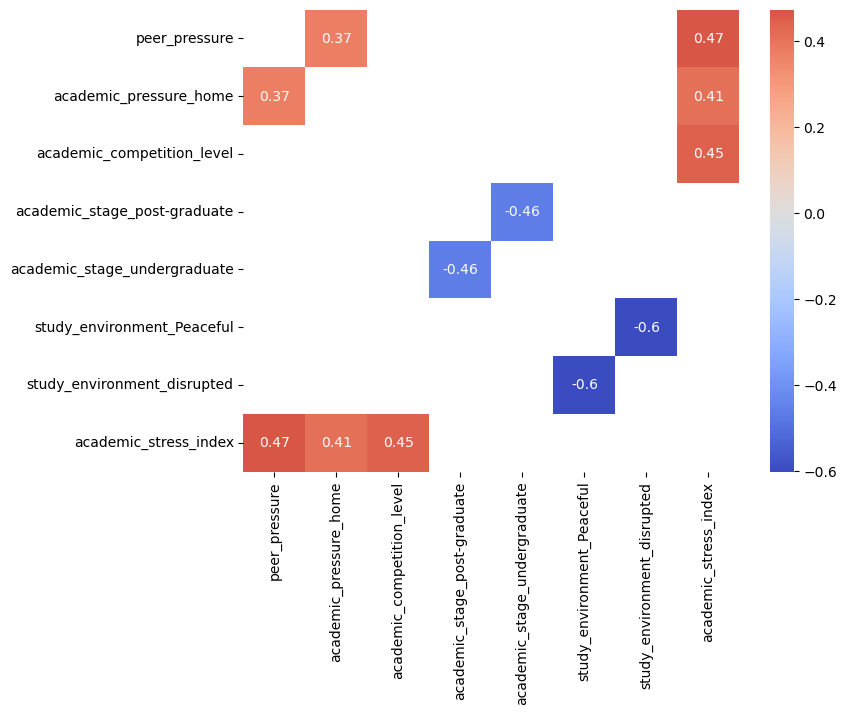

In [24]:
#O intuito principal do mapa de calor era investigar a intensidade da correlação entre as variáveis, por isso o limiar de 30% foi definido.
#No fim das contas não há nenhuma correlação que sequer chegue a 70% entre as variáveis.

filtrar_e_visualizar_correlacao(df_enc, threshold = 0.3, drop_column = None)

In [25]:
#Ainda buscando sanar as questões pertinentes, foi aplicado o CrossValidation para buscar os melhores parâmetros para o modelo.


rf_original = RandomForestClassifier(n_estimators=300, random_state=23, class_weight='balanced')

print("CROSS-VALIDATION (5-fold)")
cv_scores = cross_val_score(rf_original, x_treino_numeric, y_treino, cv=5, scoring='accuracy')

print(f"Scores individuais: {cv_scores.round(3)}")
print(f"Média: {cv_scores.mean():.3f}")
print(f"Desvio padrão: {cv_scores.std():.3f}")
print(f"Intervalo: {cv_scores.mean() - cv_scores.std():.3f} - {cv_scores.mean() + cv_scores.std():.3f}")

#Compara com o resultado no teste
print(f"\nTeste único: 0.679")
print(f"CV médio: {cv_scores.mean():.3f}")

if cv_scores.mean() > 0.679:
    print("CV Encontrou um modelo superior ao teste.")
elif cv_scores.mean() < 0.60:
    print("CV sugere overfitting no teste único...")
else:
    print("Resultados consistentes entre CV e teste")

CROSS-VALIDATION (5-fold)
Scores individuais: [0.739 0.522 0.545 0.636 0.682]
Média: 0.625
Desvio padrão: 0.082
Intervalo: 0.543 - 0.707

Teste único: 0.679
CV médio: 0.625
Resultados consistentes entre CV e teste


In [26]:
#Após a contribuição das investigações para reforçar algumas suspeitas, mais um algoritmo foi testado para buscar uma performance acima dos 70%
#O resultado, porém, seria um fracasso.

nb = GaussianNB()
cv_nb = cross_val_score(nb, x_treino_numeric, y_treino, cv=5)
print(f"Naive Bayes CV: {cv_nb.mean():.3f}")

Naive Bayes CV: 0.224


In [27]:
#Últimas tentativas antes de rotular o limite máximo de performance baseado nos resultados obtidos até o momento.

rf_simples = RandomForestClassifier(
    n_estimators=100,      
    max_depth=4,           
    min_samples_split=10,  
    random_state=23,
    class_weight='balanced'
)

cv_simples = cross_val_score(rf_simples, x_treino_numeric, y_treino, cv=5)
print(f"RF Simples CV: {cv_simples.mean():.3f}")
print(f"RF Original CV: 0.714")

RF Simples CV: 0.572
RF Original CV: 0.714


In [28]:
#Escolha do modelo final: Após testar diferentes abordagens o modelo benchmark original apresentou a melhor performance.
#Conversão de dados categóricos para numéricos
x_treino_numeric = x_treino.astype(int)
x_teste_numeric = x_teste.astype(int)

#Modelo vencedor - configuração original que obteve 71.4% de accuracy
modelo_final = RandomForestClassifier(
    n_estimators=300, 
    random_state=23, 
    class_weight='balanced'
)

modelo_final.fit(x_treino_numeric, y_treino)

y_pred_final = modelo_final.predict(x_teste_numeric)

#Esse trecho de código salvando o modelo foi adicionado posteriormente, quando a decisão de criar um sistema integrando o classificador e o regressor foi tomada.
joblib.dump(modelo_final, 'modelo_classificador_rf.pkl')

print("Modelo Salvo!")

print("MODELO FINAL - RANDOM FOREST (BENCHMARK):")
print(f"Accuracy no teste: {accuracy_score(y_teste, y_pred_final):.3f}")
print("\nRelatório de classificação:")
print(classification_report(y_teste, y_pred_final, digits=3))
print("\nMatriz de confusão:")
print(confusion_matrix(y_teste, y_pred_final, labels=['Baixo','Moderado','Alto']))

#Exibindo o CV para validar a escolha.
cv_scores = cross_val_score(modelo_final, x_treino_numeric, y_treino, cv=5)
print(f"\nValidação Cruzada (5-fold): {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

#Comparação com modelo simplificado (hiperparâmetros reduzidos)
print("\nCOMPARAÇÃO COM MODELO SIMPLIFICADO:")
rf_simples = RandomForestClassifier(
    n_estimators=100,      
    max_depth=4,           
    min_samples_split=10,  
    random_state=23,
    class_weight='balanced'
)
cv_simples = cross_val_score(rf_simples, x_treino_numeric, y_treino, cv=5)
print(f"Modelo Final (CV): {cv_scores.mean():.3f}")
print(f"Modelo Simplificado (CV): {cv_simples.mean():.3f}")
print(f"Diferença: +{(cv_scores.mean() - cv_simples.mean()):.3f} pontos a favor do modelo final")

Modelo Salvo!
MODELO FINAL - RANDOM FOREST (BENCHMARK):
Accuracy no teste: 0.714

Relatório de classificação:
              precision    recall  f1-score   support

        Alto      0.762     0.889     0.821        18
       Baixo      0.667     0.667     0.667         3
    Moderado      0.500     0.286     0.364         7

    accuracy                          0.714        28
   macro avg      0.643     0.614     0.617        28
weighted avg      0.686     0.714     0.690        28


Matriz de confusão:
[[ 2  0  1]
 [ 1  2  4]
 [ 0  2 16]]

Validação Cruzada (5-fold): 0.625 (±0.082)

COMPARAÇÃO COM MODELO SIMPLIFICADO:
Modelo Final (CV): 0.625
Modelo Simplificado (CV): 0.572
Diferença: +0.053 pontos a favor do modelo final
